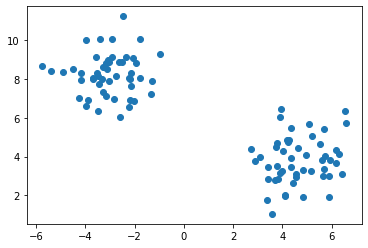

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import random

# 2 dimensional points P
X, y = make_blobs(n_samples=100, centers=2)
plt.scatter(X[:,0],X[:,1])

In [4]:
class Kmeans():
  def __init__(self, n_cluster=2, tol=0.0001, max_iter=300):
    self.n_cluster = n_cluster
    self.tol = tol
    self.max_iter = max_iter
  
  def fit(self, data):
    
    # step 1: initialize centroids of both clusters with n_cluster random data points
    init_centroids = random.sample(range(0, len(data)), self.n_cluster)
    self.centroids = [data[init_centroids[i]] for i in range(self.n_cluster)]

    for _ in range(self.max_iter):
      # step 2: assign cluster id to each point based on the minimum Euclidean distance
      self.cluster_id = []
      for point in data:
        dist = [np.linalg.norm(point - centroid) for centroid in self.centroids]
        self.cluster_id.append(np.argmin(dist))

      # step 3: calculate new centroids
      new_centroids = []
      for i in range(self.n_cluster):
        ind = np.where(np.array(self.cluster_id) == i)[0]
        new_centroids.append(np.average(data[ind], axis = 0))
      
      # step 5: save previous centroids and assign new centroids 
      prev_centroids = self.centroids
      self.centroids = new_centroids

      # step 6: check for convergence (compared to previous centroids)
      converged = True 
      for i in range(self.n_cluster):
        if sum(abs((new_centroids[i] - prev_centroids[i]) / prev_centroids[i] * 100)) > self.tol:
          converged *= False
      
      # if converged then break, otherwise go to next iteration 
      if converged:
        break

new_kmeans = Kmeans()
new_kmeans.fit(X)

# 1) set of cluster id that each point belongs to 
cluster_id = new_kmeans.cluster_id

#2) coordinates of centroids
centroids = np.array(new_kmeans.centroids)

<function matplotlib.pyplot.show>

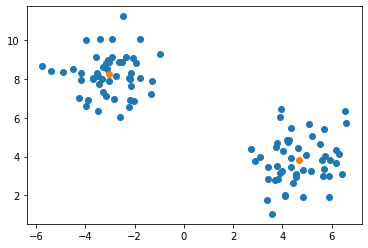

In [5]:
# visualization
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1])
plt.show